In [1]:
library(tidyverse)
library(tidylog)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘tidylog’


The following objects are masked from ‘package:dplyr’:

    add_count, add_tally, anti_join, count, distinct, distinct_all,
    distinct_at, distinct_if, filter, filter_all, filter_at, filter_if,
    full_join, group_by, group_by_all, group_by_at, group_by_if,
    inner_join, left_join, mutate, mutate_all, mutate_at, mutate_if,
    relocate, rename, rename_all, rename_at, rename_if, rename_with,
    right_join, sample_frac, sample_n, select, select_all, select_at,
    select_if, semi_join, slice, slice_head, slice_max, slice_min,
    slice_sample, slice_tail, summarise, summa

In [2]:
citations = read_tsv("https://raw.githubusercontent.com/ahmedmoustafa/AfricaPD/main/data/citations.tsv")
citations = citations %>% mutate (is_lead = factor(is_lead, levels = c("Yes", "No")))
glimpse(citations)

Rows: 173 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): is_lead
dbl (1): impact_factor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
mutate: converted 'is_lead' from character to factor (0 new NA)



Rows: 173
Columns: 3
$ is_lead            <fct> Yes, Yes, No, Yes, No, No, No, No, No, No, No, Yes,…
$ impact_factor      <dbl> 8.00, 3.90, 9.00, 2.07, 13.60, 13.60, 8.30, 30.00, …
$ citations_per_year <dbl> 1.14, 5.27, 13.25, 0.50, 7.40, 5.86, 6.61, 2.25, 1.…


Warning message:
“Removed 59 rows containing missing values (geom_point).”
Warning message:
“Removed 59 rows containing missing values (geom_point).”


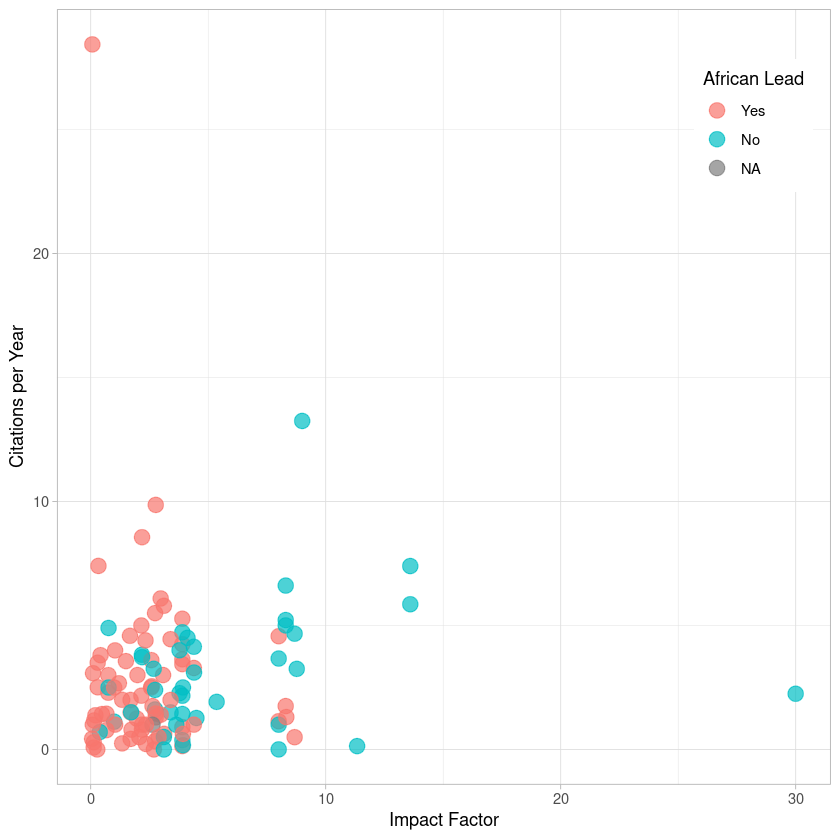

In [3]:
ggplot(citations) +
    geom_jitter(aes(x = impact_factor, y = citations_per_year, color = is_lead), size = 4, alpha = 0.7) +
    theme_light() +
    labs (x = "Impact Factor", y = "Citations per Year", color = "African Lead") +
    theme(legend.position = c(0.9, 0.85))
ggsave("figures/AfricaPDcitations.pdf", width = 6, height = 5)